In [1]:
import sys 
sys.path.append('../')
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from matplotlib.text import Text
import matplotlib.tri as tri

from utils import (
    load_poisson2d_kernel_dataset, load_helmholtz2d_kernel_dataset,
    load_poisson2dhdomain_kernel_dataset, load_helmholtz2dhdomain_kernel_dataset,
    load_cos2d_kernel_dataset, load_cos2dhdomain_kernel_dataset)
from utils import relative_err

In [2]:
nTrain = 1000
nTest = 500
idx = 10

In [3]:
import matplotlib.tri as tri

In [4]:
def vis_2D_result(upath, domain, task, idx=10, outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,3).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()
    ax3 = subfigs[2].subplots()

    if (task == 'poisson') & (domain == 'disk'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2d_kernel_dataset(
            '../data', nTrain, nTest)
    elif (task == 'poisson') & (domain == 'h'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2dhdomain_kernel_dataset(
            '../data', nTrain, nTest)
    elif (task == 'helmholtz') & (domain == 'disk'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2d_kernel_dataset(
            '../data', nTrain, nTest)
    elif (task == 'helmholtz') & (domain == 'h'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
            '../data', nTrain, nTest)
    
    upred = np.load(upath, allow_pickle=True)
    rl2 = relative_err(upred, uTest)
    print(f"task : {task} - domain : {domain}")
    print("relative L2 : {:.4e}".format(rl2))

    if domain == 'disk':
        meshy_path = os.path.join('../data', 'mesh2D_disk.mat')
    elif domain == 'h':
        meshy_path = os.path.join('../data', 'mesh2D_h.mat')
        
    ys = scipy.io.loadmat(meshy_path)['X']
    tris = scipy.io.loadmat(meshy_path)['Tri']
    triang = tri.Triangulation(ys[:,0],ys[:,1],triangles=tris)
    print("# of nodes : {:}".format(ys.shape[0]))


    upred = upred[:,idx].reshape(-1)
    uref = uTest[:,idx].reshape(-1)
    uerr = np.abs(upred - uref)
    vmin = uref.min()
    vmax = uref.max()

    im = ax1.tricontourf(
        triang, uref, levels=np.linspace(vmin, vmax, 30), cmap='jet')
    ax1.set_aspect('equal')
    ax1.set_title('Reference')
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$', rotation=0)
    ax1.set_xticklabels("")
    ax1.set_yticklabels("")
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_a = Text(0.01, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)

    im = ax2.tricontourf(
        triang, upred, levels=np.linspace(vmin, vmax, 30), cmap='jet')
    ax2.set_aspect('equal')
    ax2.set_title('Prediction')
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$', rotation=0)
    ax2.set_xticklabels("")
    ax2.set_yticklabels("")
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_b = Text(0.01, 0.8, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)
    
    im = ax3.tricontourf(
        triang, uerr, levels=30, cmap='jet')
    ax3.set_aspect('equal')
    ax3.set_title('Absolute Error')
    ax3.set_xlabel('$x_1$')
    ax3.set_ylabel('$x_2$', rotation=0)
    ax3.set_xticklabels("")
    ax3.set_yticklabels("")
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_c = Text(0.01, 0.8, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
    subfigs[2].add_artist(label_c)

    plt.savefig(outnm)

Poisson Disk

/workdir/OGA-KernelEstimation/vis/../utils.py:39: RuntimeWarning: divide by zero encountered in log
  Gref = (0.25/np.pi) * (np.log(a + b) - np.log(c + d))
/workdir/OGA-KernelEstimation/vis/../utils.py:39: RuntimeWarning: invalid value encountered in subtract
  Gref = (0.25/np.pi) * (np.log(a + b) - np.log(c + d))


task : poisson - domain : disk
relative L2 : 2.1711e-04
# of nodes : 833


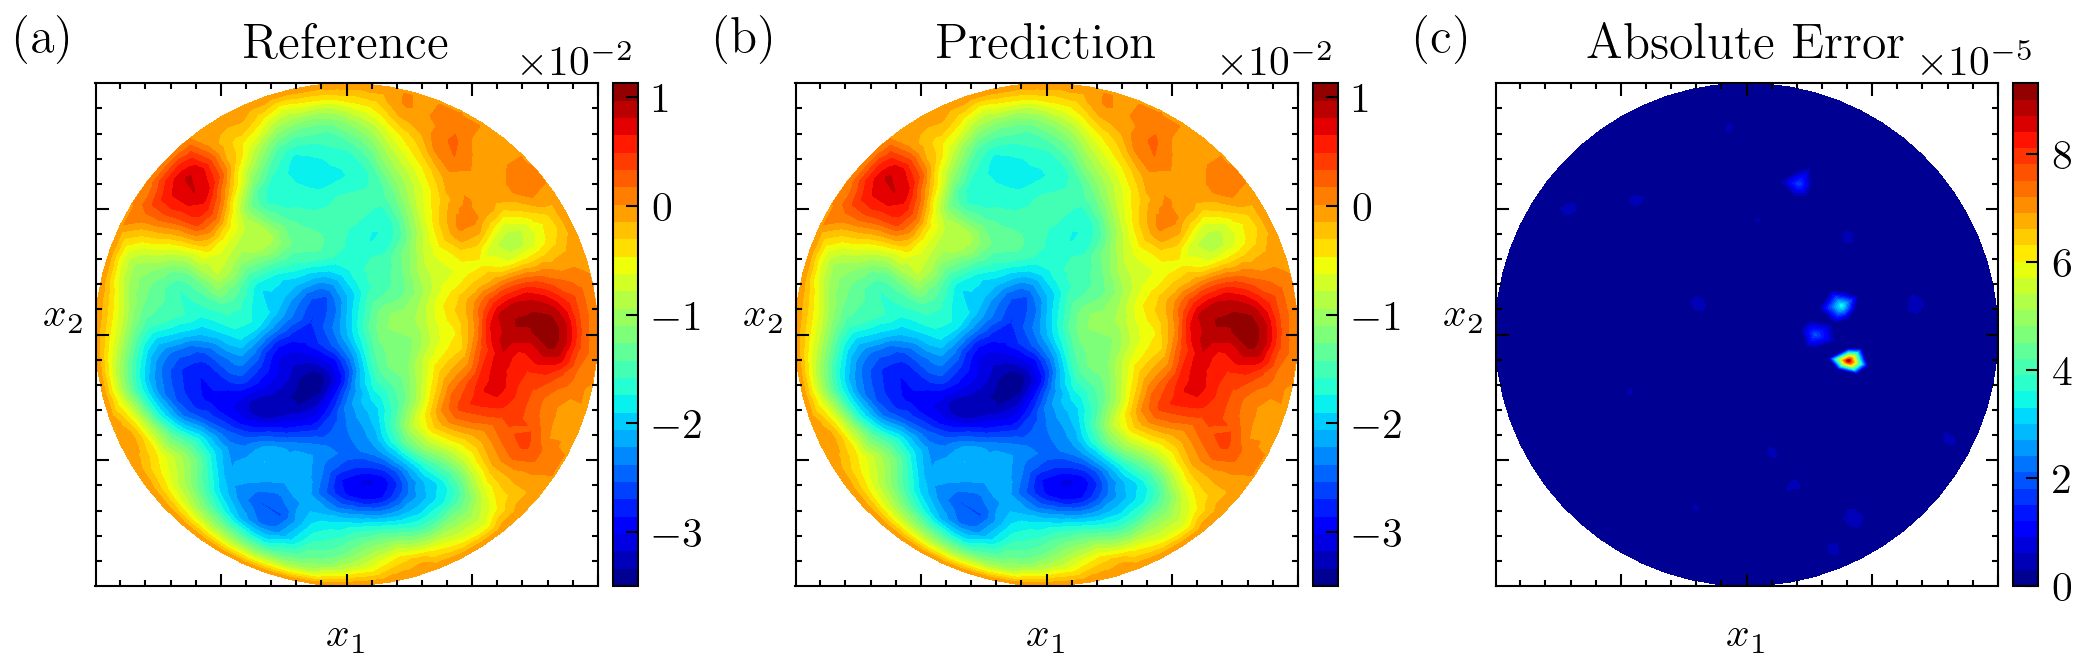

In [5]:
vis_2D_result(
    '../results/poisson2D/ogapw-512-1000-relu/upred.npy', 'disk', 'poisson', 10, outnm='poisson2D.pdf')

Helmholtz Disk

task : helmholtz - domain : disk
relative L2 : 4.4746e-04
# of nodes : 833


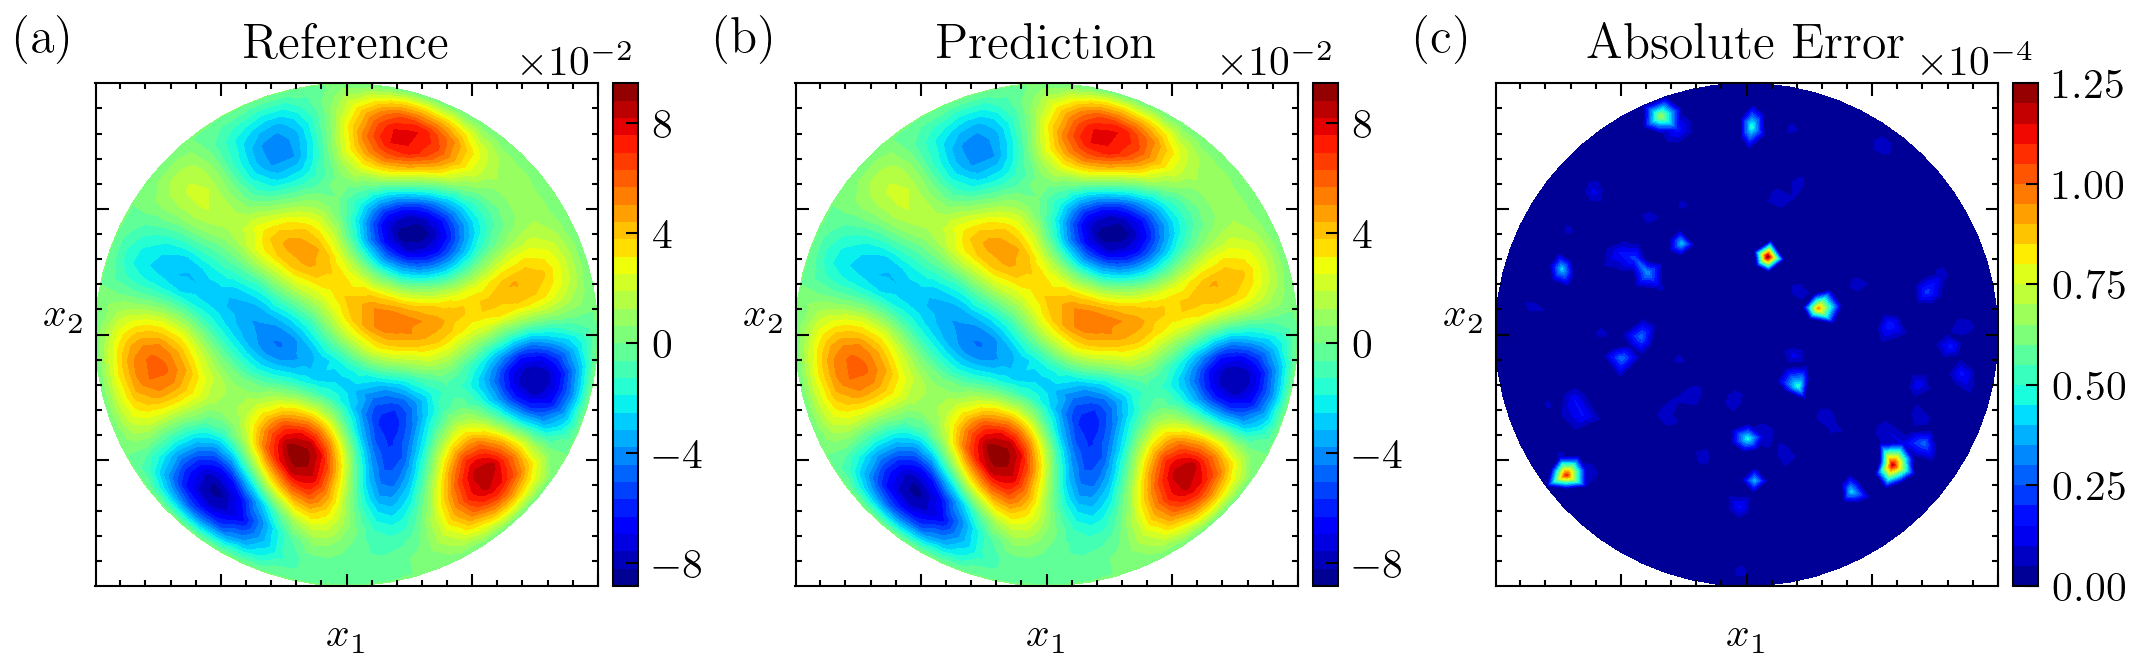

In [6]:
vis_2D_result(
    '../results/helmholtz2D/ogapw-512-1000-relu/upred.npy', 'disk', 'helmholtz', 10, outnm='helmholtz2D.pdf')

Poisson H

task : poisson - domain : h
relative L2 : 3.2233e-04
# of nodes : 997


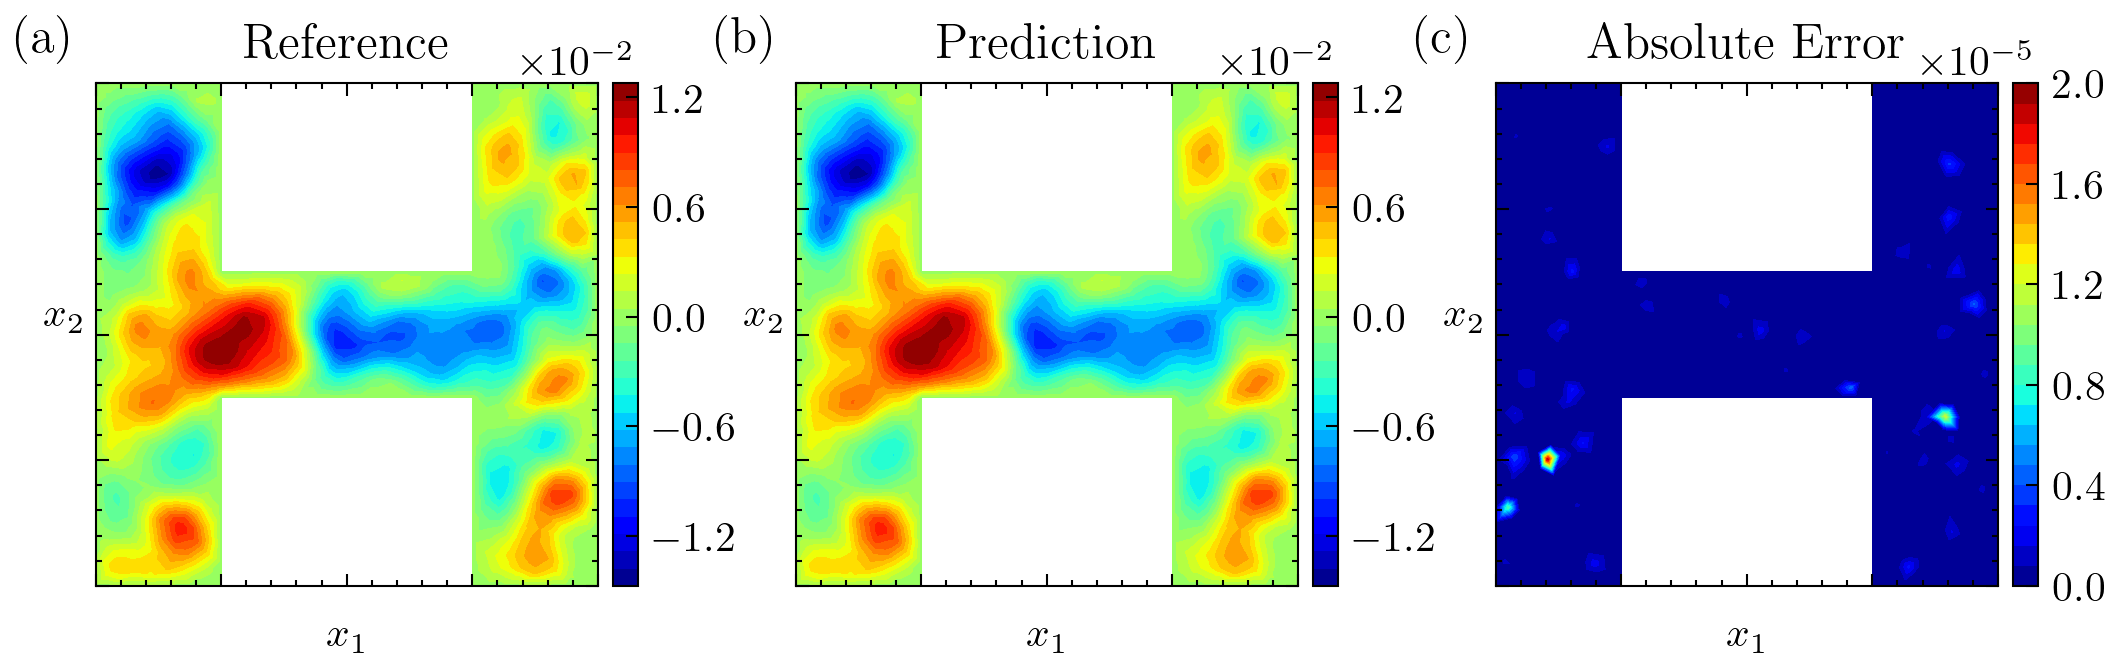

In [7]:
vis_2D_result(
    '../results/poisson2Dhdomain/ogapw-512-1000-relu/upred.npy', 'h', 'poisson', idx, outnm='poisson2DH.pdf')

Helmholtz H

task : helmholtz - domain : h
relative L2 : 1.0320e-03
# of nodes : 997


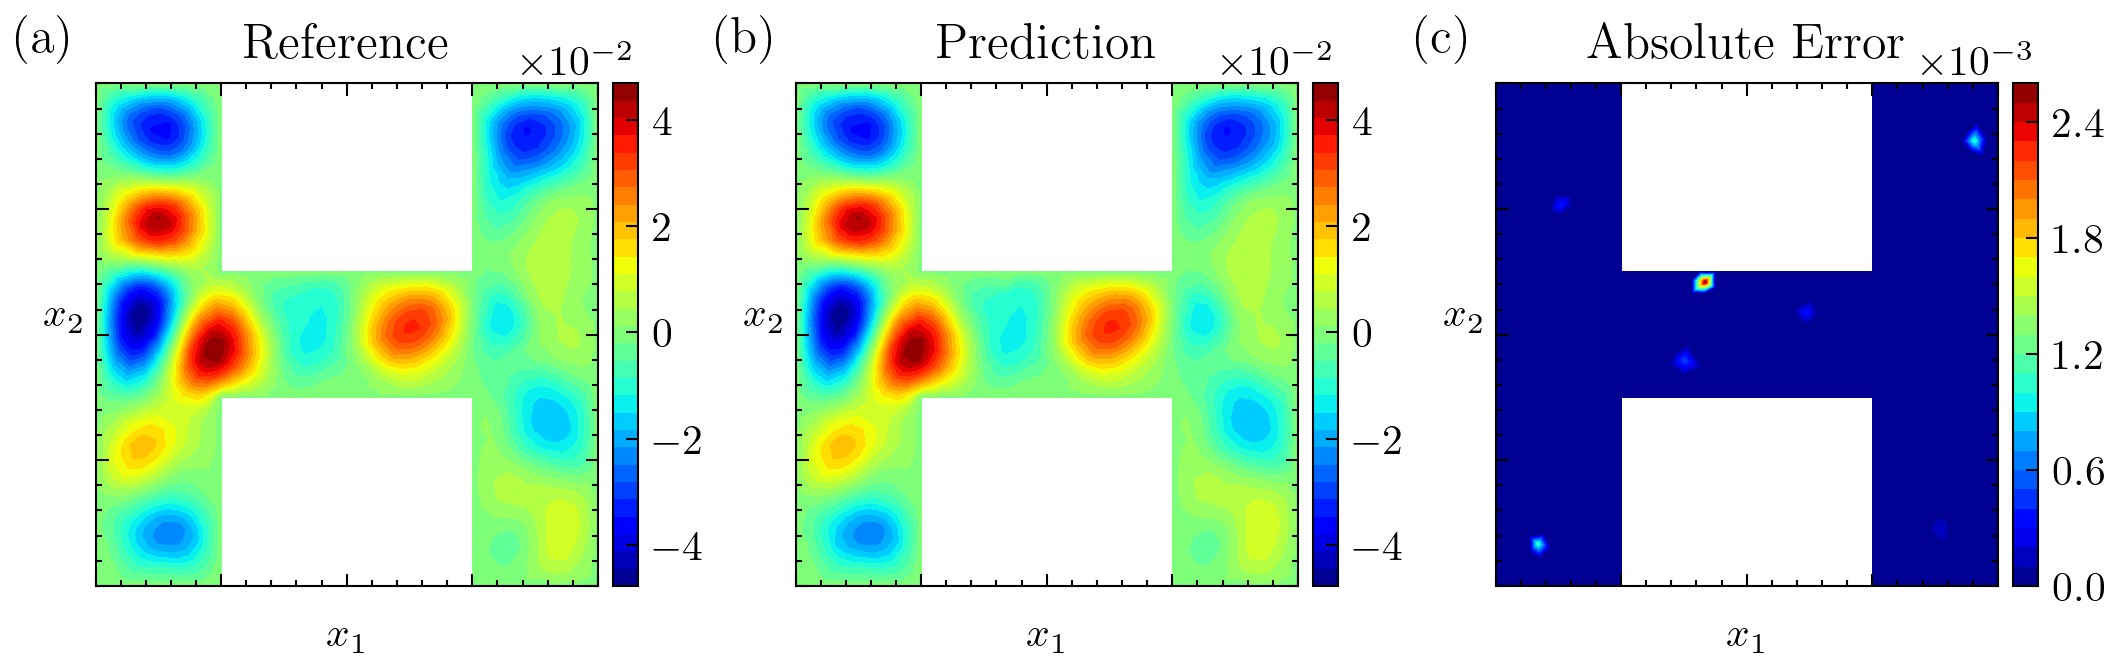

In [8]:
vis_2D_result(
    '../results/helmholtz2Dhdomain/ogapw-512-1000-relu/upred.npy', 'h', 'helmholtz', 50, outnm='helmholtz2DH.pdf')

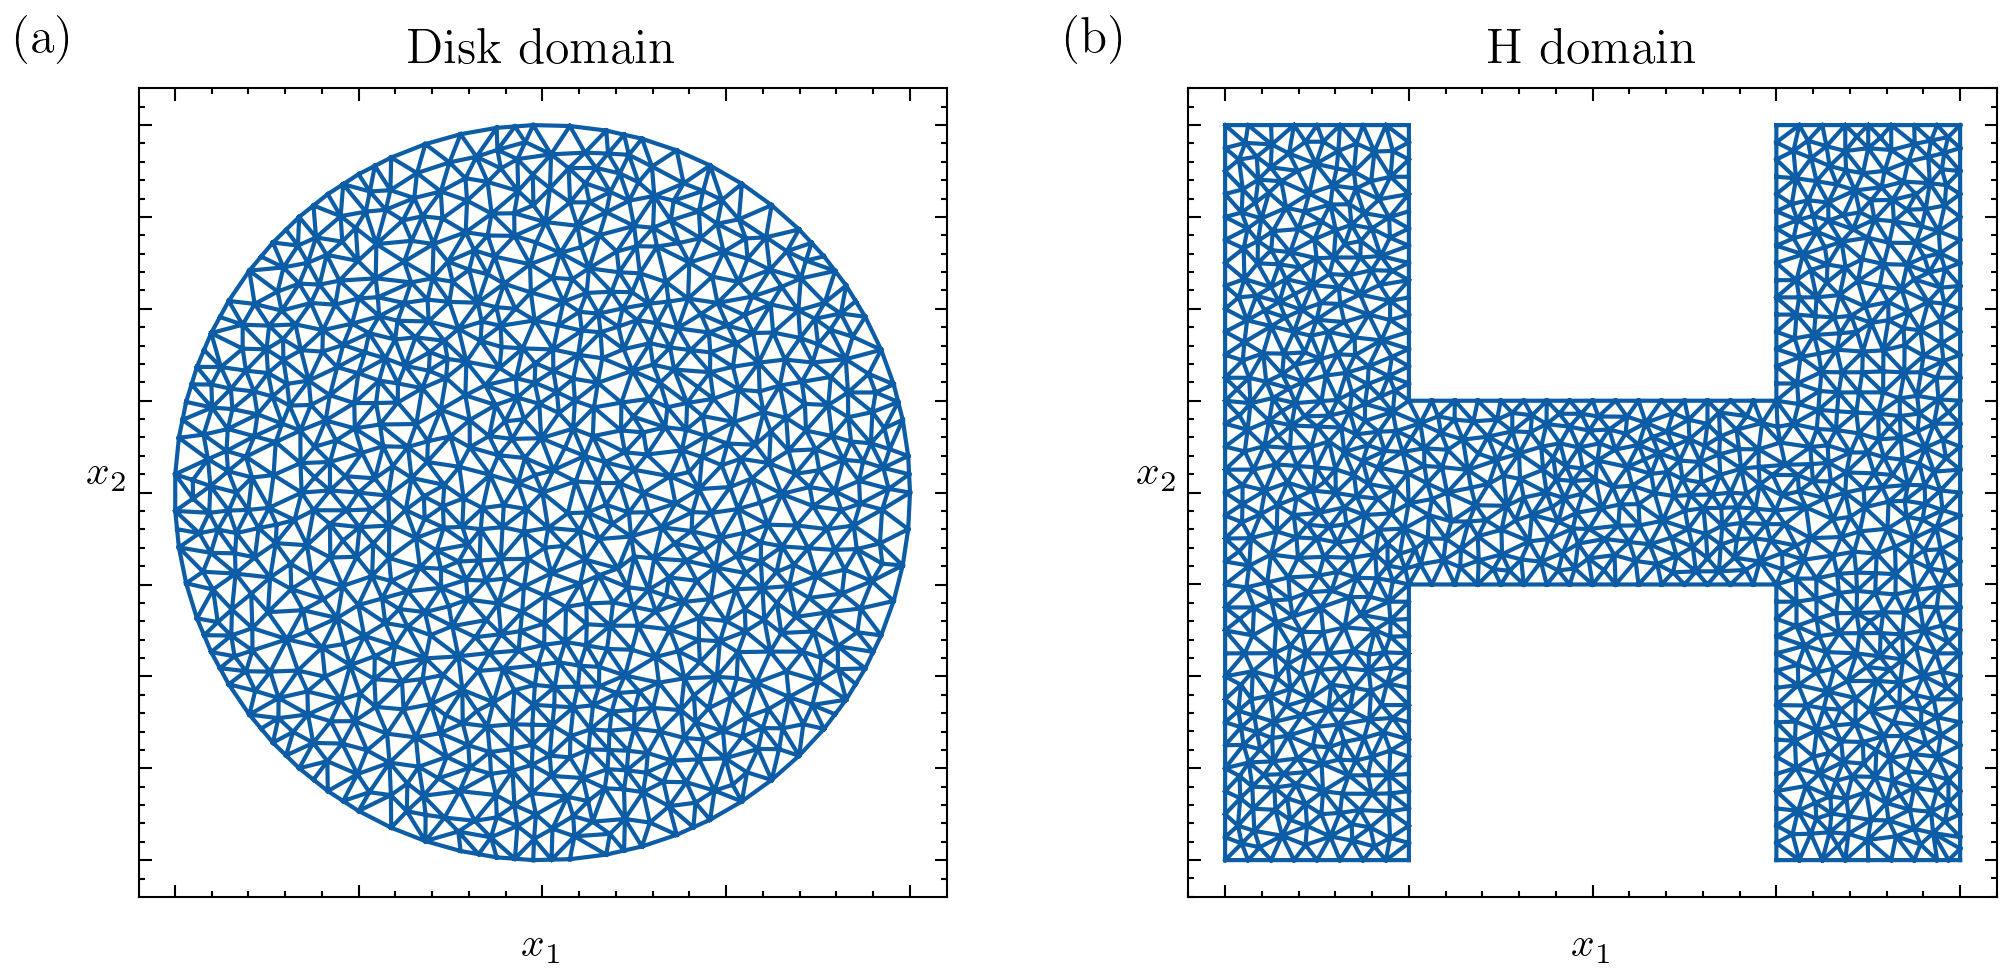

In [9]:
meshdisk_path = os.path.join('../data', 'mesh2D_disk.mat')
ys_disk = scipy.io.loadmat(meshdisk_path)['X']
tris_disk = scipy.io.loadmat(meshdisk_path)['Tri']
triang_disk = tri.Triangulation(ys_disk[:,0],ys_disk[:,1],triangles=tris_disk)

meshh_path = os.path.join('../data', 'mesh2D_h.mat')
ys_h = scipy.io.loadmat(meshh_path)['X']
tris_h = scipy.io.loadmat(meshh_path)['Tri']
triang_h = tri.Triangulation(ys_h[:,0], ys_h[:,1],triangles=tris_h)

cm = 1/2.54
f = plt.figure(figsize=(7,3.5))
subfigs = f.subfigures(1,2).flatten()
ax1 = subfigs[0].subplots()
ax2 = subfigs[1].subplots()

im = ax1.triplot(triang_disk, '-', lw=1)
ax1.set_aspect('equal')
ax1.set_title('Disk domain')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$', rotation=0)
ax1.set_xticklabels("")
ax1.set_yticklabels("")
label_a = Text(0.01, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(label_a)

im = ax2.triplot(triang_h, '-', lw=1)
ax2.set_aspect('equal')
ax2.set_title('H domain')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', rotation=0)
ax2.set_xticklabels("")
ax2.set_yticklabels("")
label_b = Text(0.01, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(label_b)

plt.savefig('mesh2D.pdf')

In [10]:
def latexlog_compare():

    fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2d_kernel_dataset(
            '../data', nTrain, nTest)
    upredpath = f'../results/poisson2D/ogapw-512-1000-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_poisson = relative_err(upred, uTest)

    fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2dhdomain_kernel_dataset(
            '../data', nTrain, nTest)
    upredpath = f'../results/poisson2Dhdomain/ogapw-512-1000-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_poissonh = relative_err(upred, uTest)

    fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2d_kernel_dataset(
            '../data', nTrain, nTest)
    upredpath = f'../results/helmholtz2D/ogapw-512-1000-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_helmholtz = relative_err(upred, uTest)

    fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
        '../data', nTrain, nTest)
    upredpath = f'../results/helmholtz2Dhdomain/ogapw-512-1000-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_helmholtzh = relative_err(upred, uTest)

    gl_poisson = np.load(f'../results/poisson2D/gl-10000-1000/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    gl_poissonh = np.load(f'../results/poisson2Dhdomain/gl-10000-1000/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    gl_helmholtz = np.load(f'../results/helmholtz2D/gl-10000-1000/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    gl_helmholtzh = np.load(f'../results/helmholtz2Dhdomain/gl-10000-1000/log.npy', allow_pickle=True).item()['utest_rl2'].min()

    don_poisson = np.min(np.load(f'../results/poisson2D/don-50000-1000/log.npy', allow_pickle=True).item()['utest_rl2'])
    don_poissonh = np.min(np.load(f'../results/poisson2Dhdomain/don-50000-1000/log.npy', allow_pickle=True).item()['utest_rl2'])
    don_helmholtz = np.min(np.load(f'../results/helmholtz2D/don-50000-1000/log.npy', allow_pickle=True).item()['utest_rl2'])
    don_helmholtzh = np.min(np.load(f'../results/helmholtz2Dhdomain/don-50000-1000/log.npy', allow_pickle=True).item()['utest_rl2'])
    
    oga_poisson = np.load(f'../results/poisson2D/oga-1024-1000-relu/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    oga_poissonh = np.load(f'../results/poisson2Dhdomain/oga-1024-1000-relu/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    oga_helmholtz = np.load(f'../results/helmholtz2D/oga-1024-1000-relu/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    oga_helmholtzh = np.load(f'../results/helmholtz2Dhdomain/oga-1024-1000-relu/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    
    print('OGApw & {:.4e} & {:.4e} & {:.4e} & {:.4e} \\\ '.format(ogapw_poisson, ogapw_poissonh, ogapw_helmholtz, ogapw_helmholtzh))
    print('OGA & {:.4e} & {:.4e} & {:.4e} & {:.4e} \\\ '.format(oga_poisson, oga_poissonh, oga_helmholtz, oga_helmholtzh))
    print('GL & {:.4e} & {:.4e} & {:.4e} & {:.4e} \\\ '.format(gl_poisson, gl_poisson, gl_helmholtz, gl_helmholtzh))
    print('DON & {:.4e} & {:.4e} & {:.4e} & {:.4e} \\\ '.format(don_poisson, don_poissonh, don_helmholtz, don_helmholtzh))

In [11]:
latexlog_compare()

/workdir/OGA-KernelEstimation/vis/../utils.py:39: RuntimeWarning: divide by zero encountered in log
  Gref = (0.25/np.pi) * (np.log(a + b) - np.log(c + d))
/workdir/OGA-KernelEstimation/vis/../utils.py:39: RuntimeWarning: invalid value encountered in subtract
  Gref = (0.25/np.pi) * (np.log(a + b) - np.log(c + d))


OGApw & 2.1711e-04 & 3.2233e-04 & 4.4746e-04 & 1.0320e-03 \\ 
OGA & 1.7431e-01 & 3.6983e-01 & 5.4723e-01 & 4.6068e-01 \\ 
GL & 3.9079e-02 & 3.9079e-02 & 1.5392e-01 & 1.9185e-01 \\ 
DON & 3.4061e-01 & 4.6031e-01 & 2.0457e-01 & 2.3465e-01 \\ 


Cosine 2D convergence rate from Kernel integral

In [35]:
def vis_oga_cos2D_dynamics(outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,2, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()
    # ax3 = subfigs[2].subplots()
    # ax4 = subfigs[3].subplots()

    cos2Dpi_logpath = '../results/cos2D/oga-1024-1000-relu/log.npy'
    cos2D2pi_logpath = '../results/cos2D2pi/oga-1024-1000-relu/log.npy'
    cos2D4pi_logpath = '../results/cos2D4pi/oga-1024-1000-relu/log.npy'
    cos2D8pi_logpath = '../results/cos2D8pi/oga-2048-1000-relu/log.npy'

    cos2Dpih_logpath = '../results/cos2Dhdomain/oga-1024-1000-relu/log.npy'
    cos2D2pih_logpath = '../results/cos2D2pihdomain/oga-1024-1000-relu/log.npy'
    cos2D4pih_logpath = '../results/cos2D4pihdomain/oga-1024-1000-relu/log.npy'
    cos2D8pih_logpath = '../results/cos2D8pi/oga-2048-1000-relu/log.npy'
    

    cos2Dpi_log = np.load(cos2Dpi_logpath, allow_pickle=True).item()
    cos2D2pi_log = np.load(cos2D2pi_logpath, allow_pickle=True).item()
    cos2D4pi_log = np.load(cos2D4pi_logpath, allow_pickle=True).item()
    # cos2D8pi_log = np.load(cos2D8pi_logpath, allow_pickle=True).item()

    cos2Dpih_log = np.load(cos2Dpih_logpath, allow_pickle=True).item()
    cos2D2pih_log = np.load(cos2D2pih_logpath, allow_pickle=True).item()
    cos2D4pih_log = np.load(cos2D4pih_logpath, allow_pickle=True).item()
    # cos2D8pih_log = np.load(cos2D8pih_logpath, allow_pickle=True).item()

    #####################
    ns = np.array([8, 16, 32, 64, 128, 256, 512, 998]) - 1
    On = ns ** (-0.875)
    ax1.plot(ns, cos2Dpi_log['utest_rl2'][ns], '-.r', label='$\epsilon_u, k=1$')
    ax1.plot(ns, cos2D2pi_log['utest_rl2'][ns], '-.g', label='$\epsilon_u, k=2$')
    ax1.plot(ns, cos2D4pi_log['utest_rl2'][ns], '-.b', label='$\epsilon_u, k=4$')
    ax1.plot(ns, cos2Dpi_log['G_rl2'][ns], '.-r', label='$\epsilon_G, k=1$')
    ax1.plot(ns, cos2D2pi_log['G_rl2'][ns], '.-g', label='$\epsilon_G, k=2$')
    ax1.plot(ns, cos2D4pi_log['G_rl2'][ns], '.-b', label='$\epsilon_G, k=4$')
    ax1.plot(ns, 10*On, '--k', label="$O(n^{-0.875})$")
    ax1.set_ylim([0.02, 1])
    ax1.set_title('$\cos(k \pi |\mathbf{x} - \mathbf{y}|), \\text{Disk}$')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 13})
    label_a = Text(-0.1, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)
    
    ax2.plot(ns, cos2Dpih_log['utest_rl2'][ns], '-.r', label='$\epsilon_u, k=1$')
    ax2.plot(ns, cos2D2pih_log['utest_rl2'][ns], '-.g', label='$\epsilon_u, k=2$')
    ax2.plot(ns, cos2D4pih_log['utest_rl2'][ns], '-.b', label='$\epsilon_u, k=4$')
    ax2.plot(ns, cos2Dpih_log['G_rl2'][ns], '.-r', label='$\epsilon_G, k=1$')
    ax2.plot(ns, cos2D2pih_log['G_rl2'][ns], '.-g', label='$\epsilon_G, k=2$')
    ax2.plot(ns, cos2D4pih_log['G_rl2'][ns], '.-b', label='$\epsilon_G, k=4$')
    # ax2.plot(cos2D8pi_log['utest_rl2'], '-y', label='$8\pi$')

    # ax2.plot(cos2D2pi_log['utrain_rl2'], '-b',label='$u_{\mathrm{test}}$')    
    ax2.plot(ns, 12*On, '--k', label="$O(n^{-0.875})$")     
    ax2.set_ylim([0.02, 1])
    ax2.set_title('$\cos(k \pi |\mathbf{x} - \mathbf{y}|), \\text{H-domain}$')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 13})
    label_b = Text(-0.15, 0.9, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)

    plt.savefig(outnm)

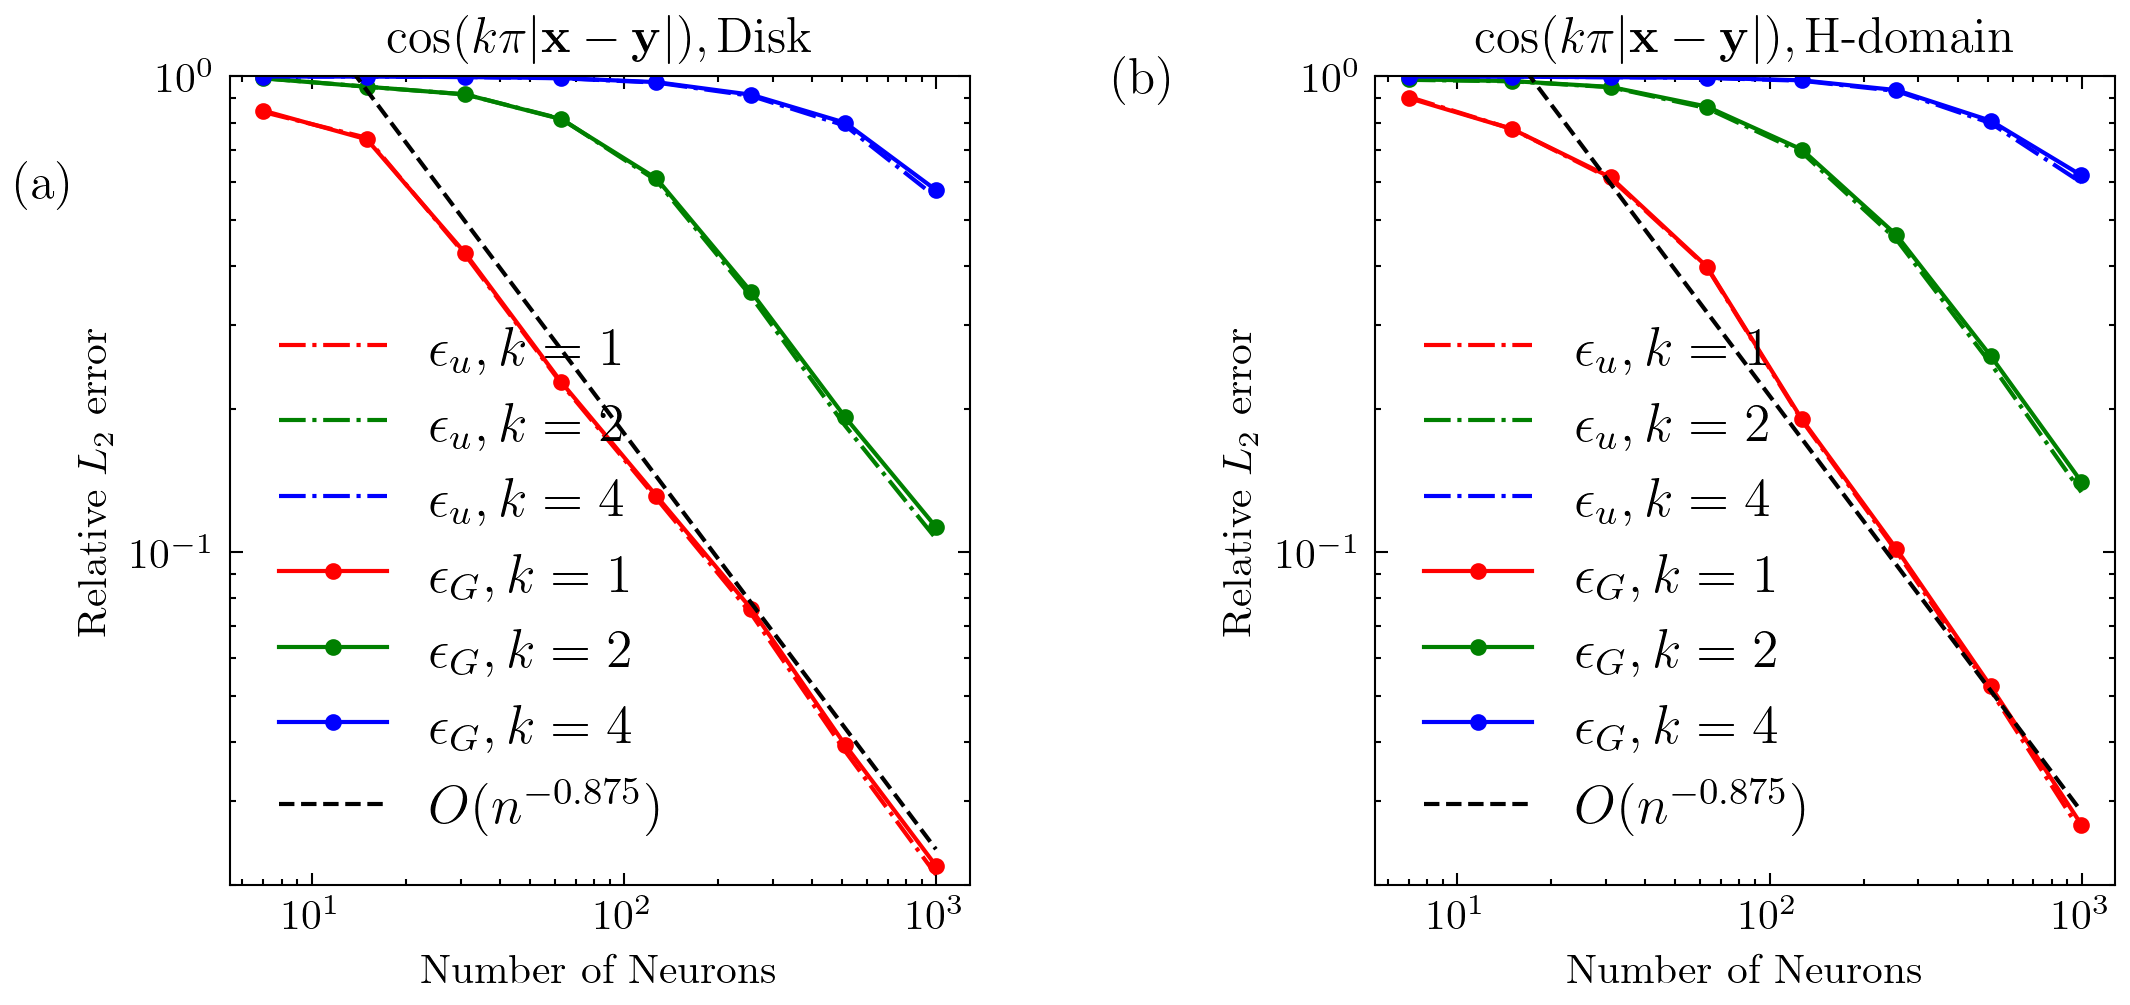

In [36]:
vis_oga_cos2D_dynamics('./cos2D_converge.pdf')

In [41]:
def vis_oga_2D_dynamics(outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,2, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()
    # ax3 = subfigs[2].subplots()

    # cos2D2pi_logpath = '../results/cos2D2pi/oga-1024-1000-relu/log.npy'
    # cos2D2pih_logpath = '../results/cos2D2pihdomain/oga-1024-1000-relu/log.npy'
    poisson2D_logpath = '../results/poisson2D/oga-1024-1000-relu/log.npy'
    helmholtz2D_logpath = '../results/helmholtz2D/oga-1024-1000-relu/log.npy'
    poisson2Dh_logpath = '../results/poisson2Dhdomain/oga-1024-1000-relu/log.npy'
    helmholtz2Dh_logpath = '../results/helmholtz2Dhdomain/oga-1024-1000-relu/log.npy'
    
    poisson2D_log = np.load(poisson2D_logpath, allow_pickle=True).item()
    helmholtz2D_log = np.load(helmholtz2D_logpath, allow_pickle=True).item()
    poisson2Dh_log = np.load(poisson2Dh_logpath, allow_pickle=True).item()
    helmholtz2Dh_log = np.load(helmholtz2Dh_logpath, allow_pickle=True).item()    
    # cos2D2pi_log = np.load(cos2D2pi_logpath, allow_pickle=True).item()
    # cos2D2pih_log = np.load(cos2D2pih_logpath, allow_pickle=True).item()

    ns = np.array([8, 16, 32, 64, 128, 256, 512, 998])-1
    #####################

    On = ns ** (-0.3)
    ax1.plot(ns, poisson2D_log['utest_rl2'][ns], '.-r', label='$\epsilon_u, \mathrm{Disk}$')
    ax1.plot(ns, poisson2D_log['G_rl2'][ns], '-.r', label='$\epsilon_G, \mathrm{Disk}$')
    ax1.plot(ns, poisson2Dh_log['utest_rl2'][ns], '.-b', label='$\epsilon_u, \mathrm{H-domain}$')
    ax1.plot(ns, 1.3*On, '--k', label="$O(n^{-0.3})$")   
    ax1.set_ylim([0.1, 1])
    # ax2.set_ylim([poisson2D_log['utrain_rl2'].min()*0.5, 1])
    ax1.set_title('Poisson')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 9})
    label_a = Text(-0.2, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)
    
    On = ns ** (-0.45)
    ax2.plot(ns, helmholtz2D_log['utest_rl2'][ns], '.-r', label='$\epsilon_u, \mathrm{Disk}$')
    ax2.plot(ns, helmholtz2Dh_log['utest_rl2'][ns], '.-b', label='$\epsilon_u, \mathrm{H-domain}$')
    ax2.plot(ns, 12*On, '--k', label="$O(n^{-0.45})$")   
    ax2.set_ylim([0.4, 1]) 
    # ax3.set_ylim([helmholtz2Dh_log['utrain_rl2'].min()*0.9, 1])
    ax2.set_title('Helmholtz')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 9})
    label_b = Text(-0.2, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)

    def print_order(oga_url2, n=2048):
        print(oga_url2.shape)
        ord = np.arange(np.log2(n).astype(int))
        ord = 2**ord - 1

        ord_test = np.zeros_like(ord, dtype='float')
        ord_test[1:] = np.log2(oga_url2[ord][:-1] / oga_url2[ord][1:])

        for i, idx in enumerate(ord):
            if i != 0:
                row_str = "{:d} & {:.2f} \\\ ".format(ord[i]+1, ord_test[i])
                print(row_str)

    plt.savefig(outnm)

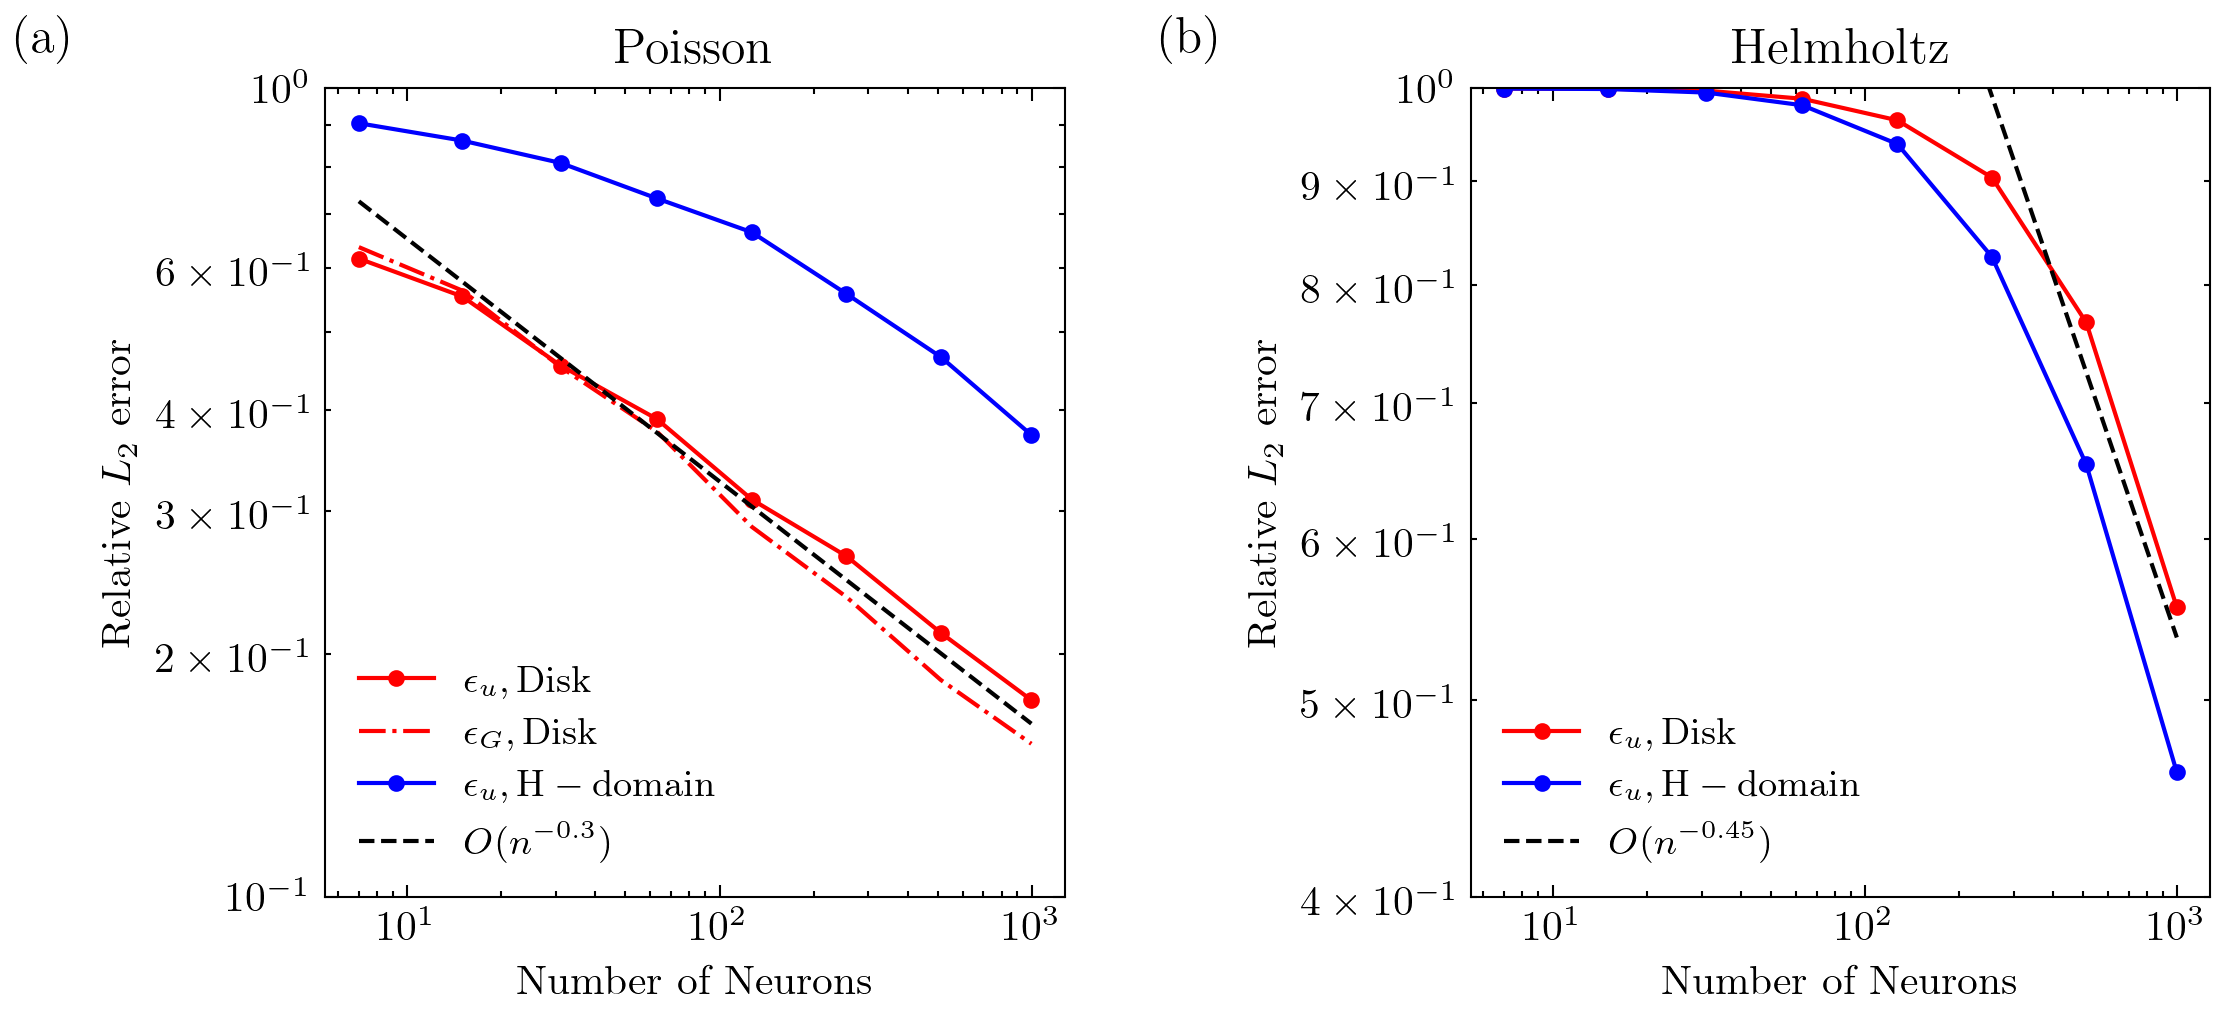

In [42]:
vis_oga_2D_dynamics('./poisson_helmholtz2D_converge.pdf')

In [23]:
def vis_ogapw_2D_dynamics(outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,3, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()
    ax3 = subfigs[2].subplots()
    # ax4 = subfigs[3].subplots()

    def load_data(task):
        print(task)
        if task == 'poisson':
            fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2d_kernel_dataset(
                '../data', nTrain, nTest)
        elif task == 'poisson_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2dhdomain_kernel_dataset(
                '../data', nTrain, nTest)
        elif task == 'helmholtz':
            fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2d_kernel_dataset(
                '../data', nTrain, nTest)
        elif task == 'helmholtz_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
                '../data', nTrain, nTest)
        elif task == 'helmholtz_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
                '../data', nTrain, nTest)
        elif task == 'cos':
            fTrain, fTest, uTrain, uTest, X, Gref = load_cos2d_kernel_dataset(
                '../data', nTrain, nTest, n=1)
        elif task == 'cos_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_cos2dhdomain_kernel_dataset(
                '../data', nTrain, nTest, n=1)
                
        url2s = []
        Grl2s = []
        ns = np.array([8, 16, 32, 64, 128, 256, 512])
        for n in ns:
            if task == 'poisson':
                upredpath = f'../results/poisson2D/ogapw-{n}-1000-relu/upred.npy'
                Gogapath = f'../results/poisson2D/ogapw-{n}-1000-relu/Goga.npy'
            elif task == 'poisson_h':
                upredpath = f'../results/poisson2Dhdomain/ogapw-{n}-1000-relu/upred.npy'
            elif task == 'helmholtz':
                upredpath = f'../results/helmholtz2D/ogapw-{n}-1000-relu/upred.npy'
            elif task == 'helmholtz_h':
                upredpath = f'../results/helmholtz2Dhdomain/ogapw-{n}-1000-relu/upred.npy'
            elif task == 'cos':
                upredpath = f'../results/cos2D/ogapw-{n}-1000-relu/upred.npy'
                Gogapath = f'../results/cos2D/ogapw-{n}-1000-relu/Goga.npy'
            elif task == 'cos_h':
                upredpath = f'../results/cos2Dhdomain/ogapw-{n}-1000-relu/upred.npy'
                Gogapath = f'../results/cos2Dhdomain/ogapw-{n}-1000-relu/Goga.npy'

            upred = np.load(upredpath, allow_pickle=True)
            url2 = relative_err(upred, uTest)
            url2s.append(url2)

            if ("cos" in task):
                Gpred = np.load(Gogapath, allow_pickle=True)
                Grl2 = relative_err(Gpred, Gref)
            elif task == 'poisson':
                Gpred = np.load(Gogapath, allow_pickle=True)
                Gref = Gref.reshape(-1)
                Gmask = ~np.isnan(Gref) & ~np.isinf(Gref)
                Grl2 = relative_err(Gpred[Gmask], Gref[Gmask])
            else:
                Grl2 = 1

            Grl2s.append(Grl2)
            print("n : {:} rl2 : {:.4e}".format(n, url2))
        
        return ns, np.array(url2s), np.array(Grl2s)
    
    ns, poisson2D_ulog, poisson2D_Glog = load_data('poisson')
    ns, poisson2Dh_ulog, poisson2Dh_Glog = load_data('poisson_h') 
    ns, helmholtz2D_ulog, helmholtz2D_Glog = load_data('helmholtz')
    ns, helmholtz2Dh_ulog, helmholtz2Dh_Glog = load_data('helmholtz_h')
    ns, cos2D_ulog, cos2D_Glog = load_data('cos')
    ns, cos2Dh_ulog, cos2Dh_Glog = load_data('cos_h')

    #####################
    # On = np.exp(-0.02*ns) #** (-1.25)
    On = ns ** (-1.25)
    ax1.plot(ns, cos2D_ulog, '-.r', label='$\epsilon_u, \mathrm{Disk}$')
    ax1.plot(ns, cos2Dh_ulog, '-.b', label='$\epsilon_u, \mathrm{H-domain}$')
    ax1.plot(ns, cos2D_Glog, '.-r', label='$\epsilon_G, \mathrm{Disk}$')
    ax1.plot(ns, cos2Dh_Glog, '.-b', label='$\epsilon_G, \mathrm{H-domain}$')
    ax1.plot(ns, 3*On, '--k', label="$O(n^{-1.25})$")
    ax1.set_ylim([1e-5, 100])
    ax1.set_title('$\cos(\pi |\mathbf{x} - \mathbf{y}|)$')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 9})
    label_a = Text(-0.15, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)

    On = ns ** (-.65)
    ax2.plot(ns, poisson2D_ulog, '-.r', label='$\epsilon_u, \mathrm{Disk}$')
    ax2.plot(ns, poisson2D_Glog, '.-r', label='$\epsilon_G, \mathrm{Disk}$')
    ax2.plot(ns, poisson2Dh_ulog, '-.b', label='$\epsilon_u, \mathrm{H-domain}$')
    ax2.plot(ns, 1.5*On, '--k', label="$O(n^{-0.65})$")
    ax2.set_ylim([1e-5, 100])
    ax2.set_title('Poisson')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 9})
    label_b = Text(-0.15, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)
    
    ax3.plot(ns, helmholtz2D_ulog, '-.r', label='$\epsilon_u, \mathrm{Disk}$')
    ax3.plot(ns, helmholtz2Dh_ulog, '-.b',label='$\epsilon_u, \mathrm{H-domain}$')
    # ax3.plot(ns, 10*On, '--k', label="$O(n^{-1.25})$")
    ax3.set_ylim([1e-5, 100])
    ax3.set_title('Helmholtz')
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    ax3.set_xlabel("Number of Neurons")
    ax3.set_ylabel("Relative $L_2$ error")
    ax3.legend(loc='lower left', prop={'size': 9})
    label_c = Text(-0.15, 0.95, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
    subfigs[2].add_artist(label_c)

    # print("Poisson Disk")
    # print_order(poisson2D_log['utest_rl2'])
    # print("Poisson Hdomain")
    # print_order(poisson2Dh_log['utest_rl2'])
    # print("Helmholtz Disk")
    # print_order(helmholtz2D_log['utest_rl2'])
    # print("Helmholtz Hdomain")
    # print_order(helmholtz2Dh_log['utest_rl2'], n=1024)

    # plt.tight_layout()


    plt.savefig(outnm)

poisson
n : 8 rl2 : 3.5400e-01
n : 16 rl2 : 2.3371e-01
n : 32 rl2 : 1.6124e-01
n : 64 rl2 : 1.0997e-01
n : 128 rl2 : 6.1895e-02
n : 256 rl2 : 1.1653e-02
n : 512 rl2 : 2.1711e-04
poisson_h
n : 8 rl2 : 6.4803e-01
n : 16 rl2 : 4.6178e-01
n : 32 rl2 : 2.8139e-01
n : 64 rl2 : 1.3727e-01
n : 128 rl2 : 4.8921e-02
n : 256 rl2 : 8.3096e-03
n : 512 rl2 : 3.2233e-04
helmholtz
n : 8 rl2 : 9.1131e-01
n : 16 rl2 : 6.7838e-01
n : 32 rl2 : 3.9604e-01
n : 64 rl2 : 1.9488e-01
n : 128 rl2 : 9.0775e-02
n : 256 rl2 : 1.6057e-02
n : 512 rl2 : 4.4746e-04
helmholtz_h
n : 8 rl2 : 8.4819e-01
n : 16 rl2 : 6.4855e-01
n : 32 rl2 : 3.4686e-01
n : 64 rl2 : 1.5132e-01
n : 128 rl2 : 6.3379e-02
n : 256 rl2 : 9.2156e-03
n : 512 rl2 : 1.0320e-03
cos
n : 8 rl2 : 2.4430e-01
n : 16 rl2 : 9.5820e-02
n : 32 rl2 : 3.8474e-02
n : 64 rl2 : 1.4230e-02
n : 128 rl2 : 4.3370e-03
n : 256 rl2 : 5.8589e-04
n : 512 rl2 : 2.2052e-05
cos_h
n : 8 rl2 : 2.9279e-01
n : 16 rl2 : 1.1346e-01
n : 32 rl2 : 4.2373e-02
n : 64 rl2 : 1.4934e-02
n : 1

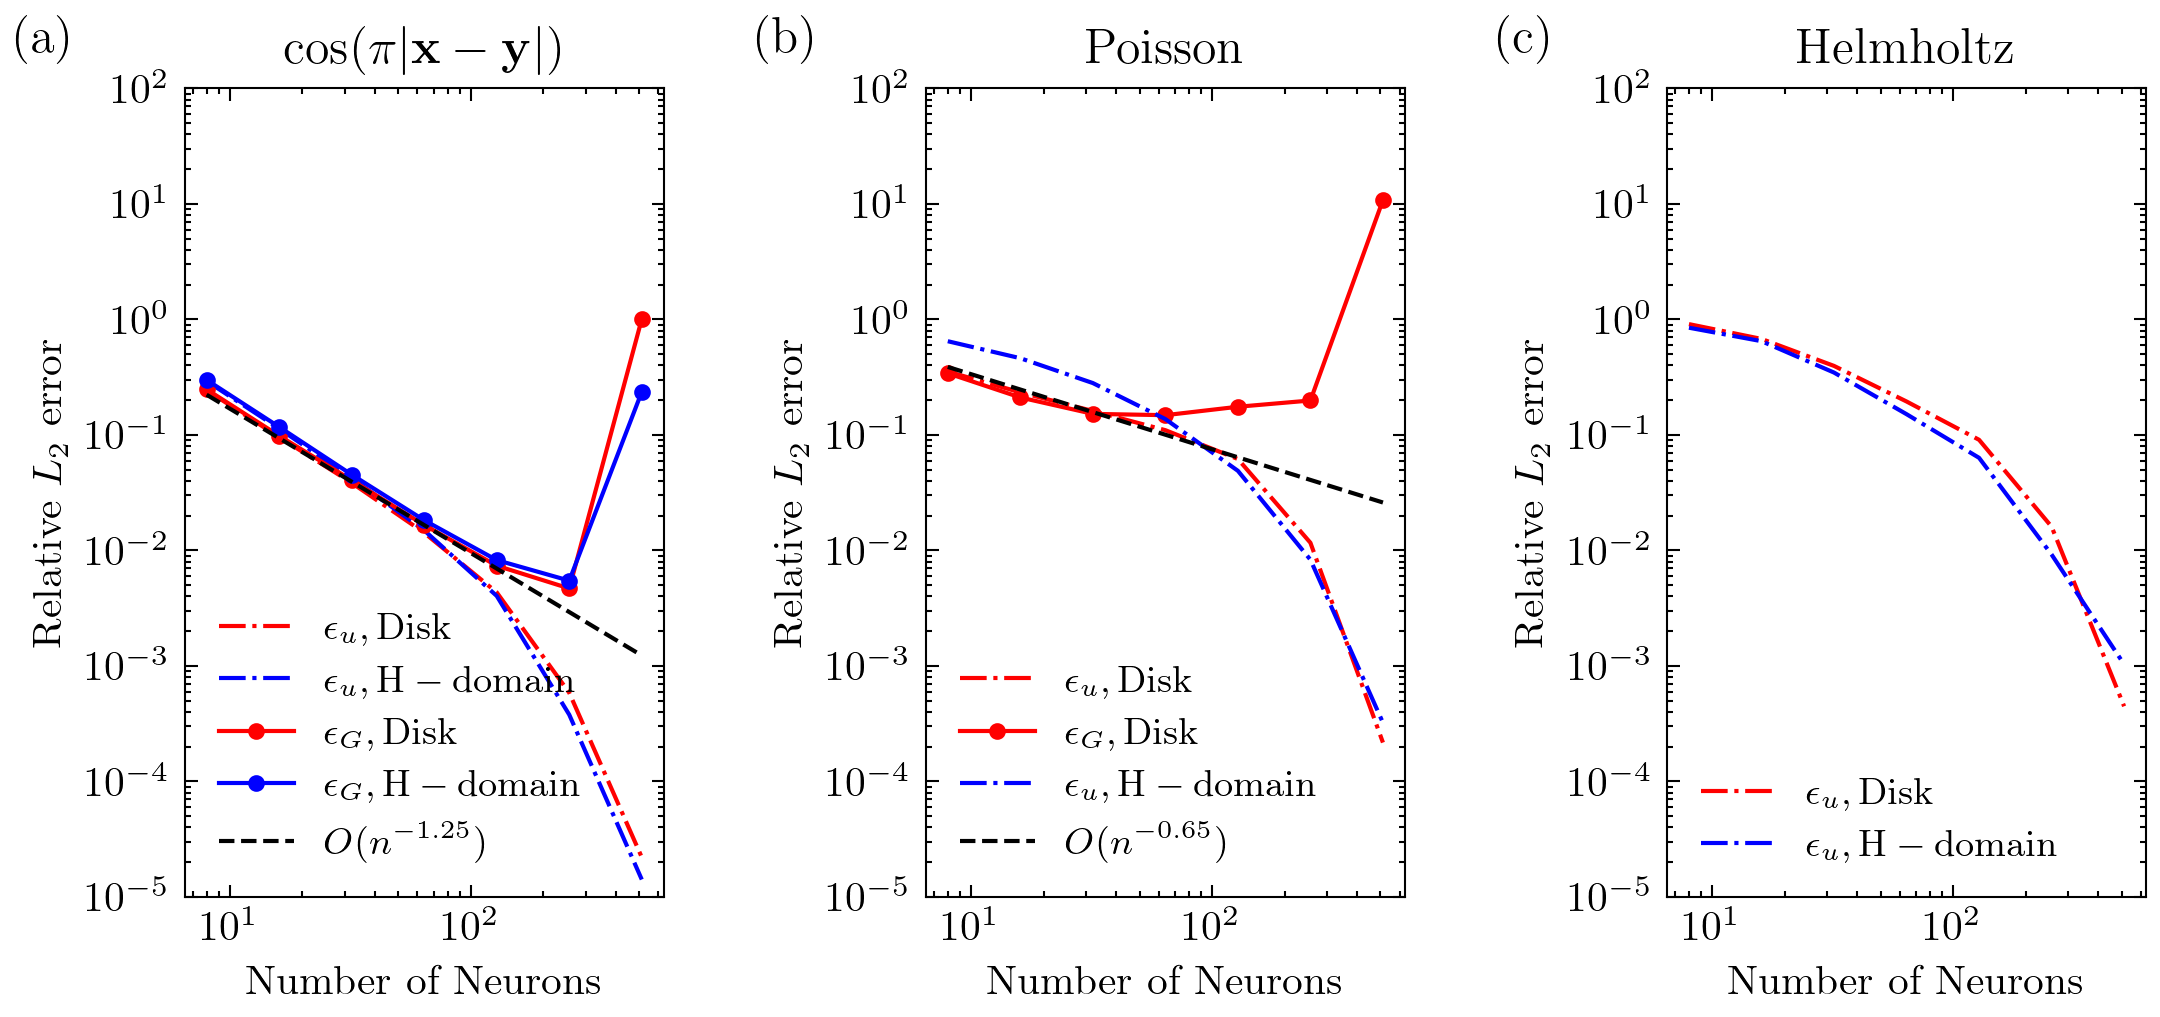

In [24]:
vis_ogapw_2D_dynamics('./ogapw_converge.pdf')